<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/burn_severity/Validation_Results_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remote Sensing of Wildfires: Results Analysis & Google Earth Validation

*This notebook prepares GIS files for Google Earth inspection*

## Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.
- The figures and histograms are interactable via mouse/touch pad actions. Interactable functions can be selected on the top right corners of each figure.

This routine uses the following python libraries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few seconds to complete.

In [ ]:
import geopandas as gpd

## Generate validation points in GEE

Validation Pts: https://docs.google.com/spreadsheets/d/1ZC5Ctd7t6YJPp_rqrJDnuDz_RPrxtCmLhfHnIZKKhLo/edit#gid=649276455


In [ ]:
# From SAR and dNBR agreement/disagreement raster make a "reclassified" KMZ version

# read in reclassified

# polygonize

# convert to KMZ (set colors)

In [ ]:
# within each class, generate random points

# points should have lat/lon column, class column

In [ ]:
# can generate plots here too

## CalVeg

This has already been clipped to the extent of the Verdugo Mountains.

In [18]:
# Read GeoJSON file
gdf = gpd.read_file("calveg_latuna.geojson")

# Print dataframe header
gdf.head()

# Column - 'REGIONAL_DOMINACE_TYPE

,OBJECTID,FS_UNIT_NAME,FS_UNIT_ID,PHYSIOGNOMIC_UNIT,USGS_ANDERSON_1,USGS_ANDERSON_2,LOCAL_ANDERSON_2_SUP,SAF_COVER_TYPE,SRM_COVER_TYPE,NVCS_CLASS,...,SOURCE_DATE,CON_CFA,HDW_CFA,SHB_CFA,TOTAL_TREE_CFA,OS_TREE_DIAMETER_CLASS_1_R5,OS_TREE_DIAMETER_CLASS_2_R5,SHAPE_Length,SHAPE_Area,geometry
0,4486,None,None,None,1,17,None,000,007,None,...,2002-07-26 00:00:00+00:00,None,None,None,None,None,None,3.019651,0.000587,"MULTIPOLYGON (((-118.28093 34.22862, -118.2809..."
1,5864,None,None,None,3,32,None,000,205,C02,...,1997-07-04 00:00:00+00:00,None,None,None,None,None,None,0.008959,0.000002,"MULTIPOLYGON (((-118.27513 34.21470, -118.2752..."
2,6248,None,None,None,3,31,None,000,215,C02,...,1997-07-04 00:00:00+00:00,None,None,None,None,None,None,9.197481,0.003067,"MULTIPOLYGON (((-118.36411 34.25996, -118.3640..."
3,6853,None,None,None,3,32,None,000,205,C02,...,1997-07-04 00:00:00+00:00,None,None,None,None,None,None,4.591924,0.001410,"MULTIPOLYGON (((-118.33197 34.25679, -118.3319..."
4,7126,None,None,None,3,32,None,000,205,C02,...,1997-07-04 00:00:00+00:00,None,None,None,None,None,None,1.689116,0.000422,"MULTIPOLYGON (((-118.24542 34.18741, -118.2454..."


In [26]:
# Drop columns where all values are null
gdf_1 = gdf.dropna(axis=1, how='all')
# Drop columns where there is only 1 unique value
nunique = gdf_1.nunique()
cols_to_drop = nunique[nunique == 1].index
gdf_2 = gdf_1.drop(cols_to_drop, axis=1)

list(gdf_2)

['OBJECTID',
 'USGS_ANDERSON_1',
 'USGS_ANDERSON_2',
 'SAF_COVER_TYPE',
 'SRM_COVER_TYPE',
 'NVCS_CLASS',
 'NVCS_SUBCLASS',
 'NVCS_FORMATION',
 'NVCS_DIVISION',
 'NVCS_MACROGROUP',
 'NVCS_GROUP',
 'AGGREGATION_TYPE',
 'REGIONAL_DOMINANCE_TYPE',
 'REG_DOMINANCE_TYPE_REFERENCE',
 'TREE_CFA_CLASS',
 'HARDWOOD_CFA_CLASS',
 'OS_TREE_DIAMETER_CLASS',
 'MAP_UPDATE_CAUSE',
 'SOURCE_DATE_YEAR',
 'SOURCE_DATE_DAY',
 'REV_DATE',
 'COVERTYPE',
 'R05_DATA_SOURCE',
 'PROD',
 'CWHR_LIFEFORM',
 'CWHR_TYPE',
 'CWHR_SIZE',
 'CWHR_DENSITY',
 'SOURCE_DATE',
 'HDW_CFA',
 'TOTAL_TREE_CFA',
 'OS_TREE_DIAMETER_CLASS_1_R5',
 'SHAPE_Length',
 'SHAPE_Area',
 'geometry']

In [35]:
# add longer description to 2 letter codes
code_mapping = {
    'BA': 'Baren',
    'CC': 'CEANOTHUS CHAPARRAL ALLIANCE',
    'CQ': 'LOWER MONTANE MIXED CHAPARRAL ALLIANCE',
    'CS': 'SCRUB OAK ALLIANCE',
    'DM': 'BIGCONE DOUGLAS-FIR ALLIANCE',
    'EX': 'COASTAL MIXED HARDWOOD ALLIANCE',
    'HG': 'Annual Grasses and Forbs',
    'IB': 'URBAN-RELATED BARE SOIL',
    'QA': 'Coast Live Oak',
    'QB': 'CALIFORNIA BAY ALLIANCE',
    'QZ': 'EUCALYPTUS ALLIANCE',
    'SB': 'BUCKWHEAT ALLIANCE',
    'SM': 'SUMAC SHRUB ALLIANCE',
    'SQ': 'Soft Scrub - Mixed Chaparral',
    'SS': 'California Sagebrush (Coastal Sage Scrub)'
    # Add more mappings as needed
}


def map_code_to_name(code):
    return code_mapping.get(code, 'Unknown')

gdf['full_name'] = gdf['REGIONAL_DOMINANCE_TYPE'].map(map_code_to_name)



<Axes: >

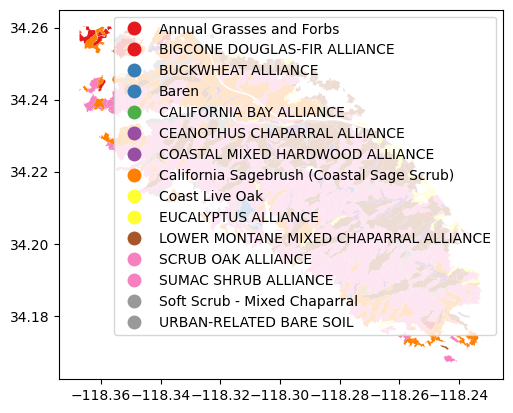

In [41]:
gdf.plot("full_name", cmap="Set1", legend=True)